# Heart Disease Prediction by ML

### Import Library

In [12]:
import pandas as pd
import numpy as np  #Matrix Multiplication
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from collections import Counter
from xgboost import XGBClassifier

### load the dataset

In [13]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\heart_disease .csv")

In [14]:
df.head()  #top 5 row

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Pred
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


### Info of Dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   gender    297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  Pred      297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [16]:
df.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
Pred        0
dtype: int64

In [17]:
df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Pred
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [18]:
df.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
Pred        0
dtype: int64

In [19]:
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Pred
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
293,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
294,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
295,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


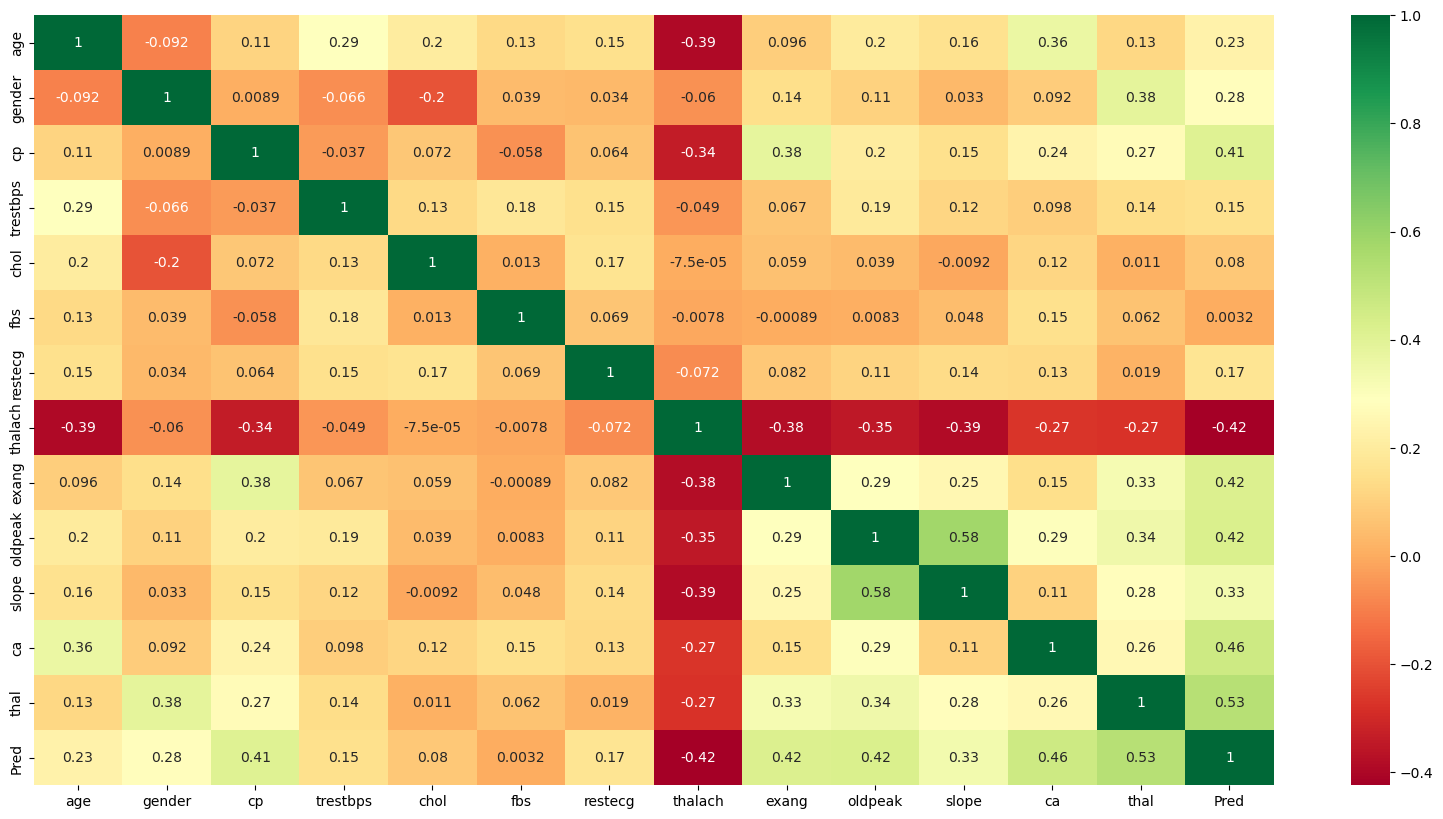

In [20]:
# to see the correlation of different attributes
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
#plot Heat Map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'Pred'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

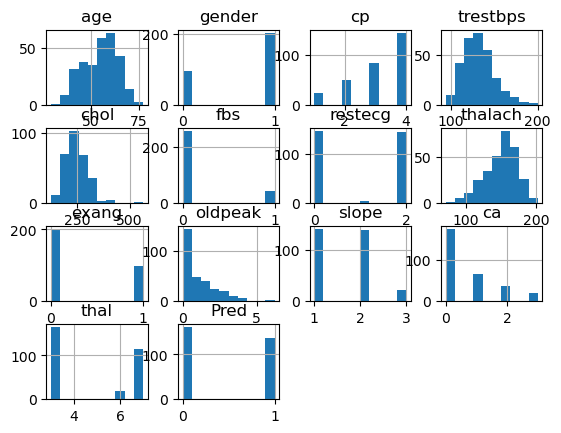

In [21]:
df.hist()

<AxesSubplot:xlabel='Pred', ylabel='count'>

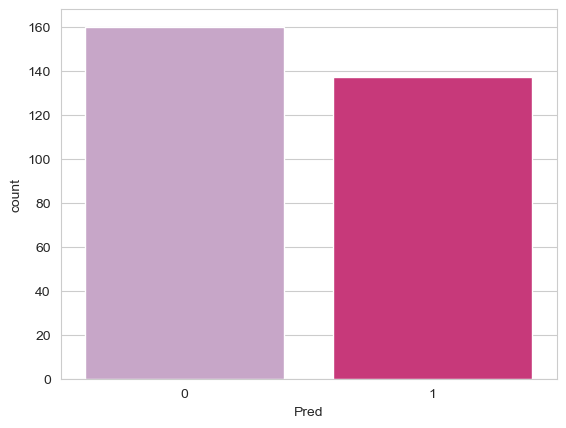

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Pred',data=df,palette='PuRd')

## Data processing

### The idea behind it is to create dummy column for categorical variable

In [23]:
dataset= pd.get_dummies(df,columns=['gender','cp','fbs','restecg','exang','slope','ca','thal'])

In [24]:
standardScaler=StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale]=standardScaler.fit_transform(dataset[columns_to_scale])

In [25]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,Pred,gender_0,gender_1,cp_1,cp_2,...,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
0,0.936181,0.750380,-0.276443,0.017494,1.068965,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [26]:
y = df['Pred']
x = df.drop('Pred',axis=1)
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.20,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [27]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 124, 1: 113})

In [28]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model= lr.fit(x_train,y_train)
lr_predict = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test,lr_predict)
lr_acc_score = accuracy_score(y_test,lr_predict)
print ("Confussion Mtarix")
print (lr_conf_matrix)
print ("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print (classification_report(y_test,lr_predict))

Confussion Mtarix
[[32  4]
 [ 4 20]]


Accuracy of Logistic Regression: 86.66666666666667 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



In [29]:
m2 = 'Naive Bayes'
nb = GaussianNB()
model=nb.fit(x_train,y_train)
nb_predict = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test,nb_predict)
nb_acc_score = accuracy_score(y_test,nb_predict)
print ("Confussion Mtarix")
print (nb_conf_matrix)
print ("\n")
print("Accuracy of Naive Bayes:",nb_acc_score*100,'\n')
print (classification_report(y_test,nb_predict))

Confussion Mtarix
[[35  1]
 [ 4 20]]


Accuracy of Naive Bayes: 91.66666666666666 

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        36
           1       0.95      0.83      0.89        24

    accuracy                           0.92        60
   macro avg       0.92      0.90      0.91        60
weighted avg       0.92      0.92      0.92        60



In [30]:
m3 = 'Random Forest Classifier'
rf = RandomForestClassifier(n_estimators=10,random_state=2,max_depth=5)
model=rf.fit(x_train,y_train)
rf_predict = rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test,rf_predict)
rf_acc_score = accuracy_score(y_test,rf_predict)
print ("Confussion Mtarix")
print (rf_conf_matrix)
print ("\n")
print("Accuracy of Random Forest Classifier:",rf_acc_score*100,'\n')
print (classification_report(y_test,rf_predict))

Confussion Mtarix
[[32  4]
 [ 2 22]]


Accuracy of Random Forest Classifier: 90.0 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [31]:
#applying KNN Classifier & find the Value of 'K'
knn_score =[]
for k in range (1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    score= cross_val_score(knn,x,y,cv=10)
    knn_score.append(score.mean())

Text(0.5, 1.0, 'k Neighbors Classifier Scores for Different K-Values')

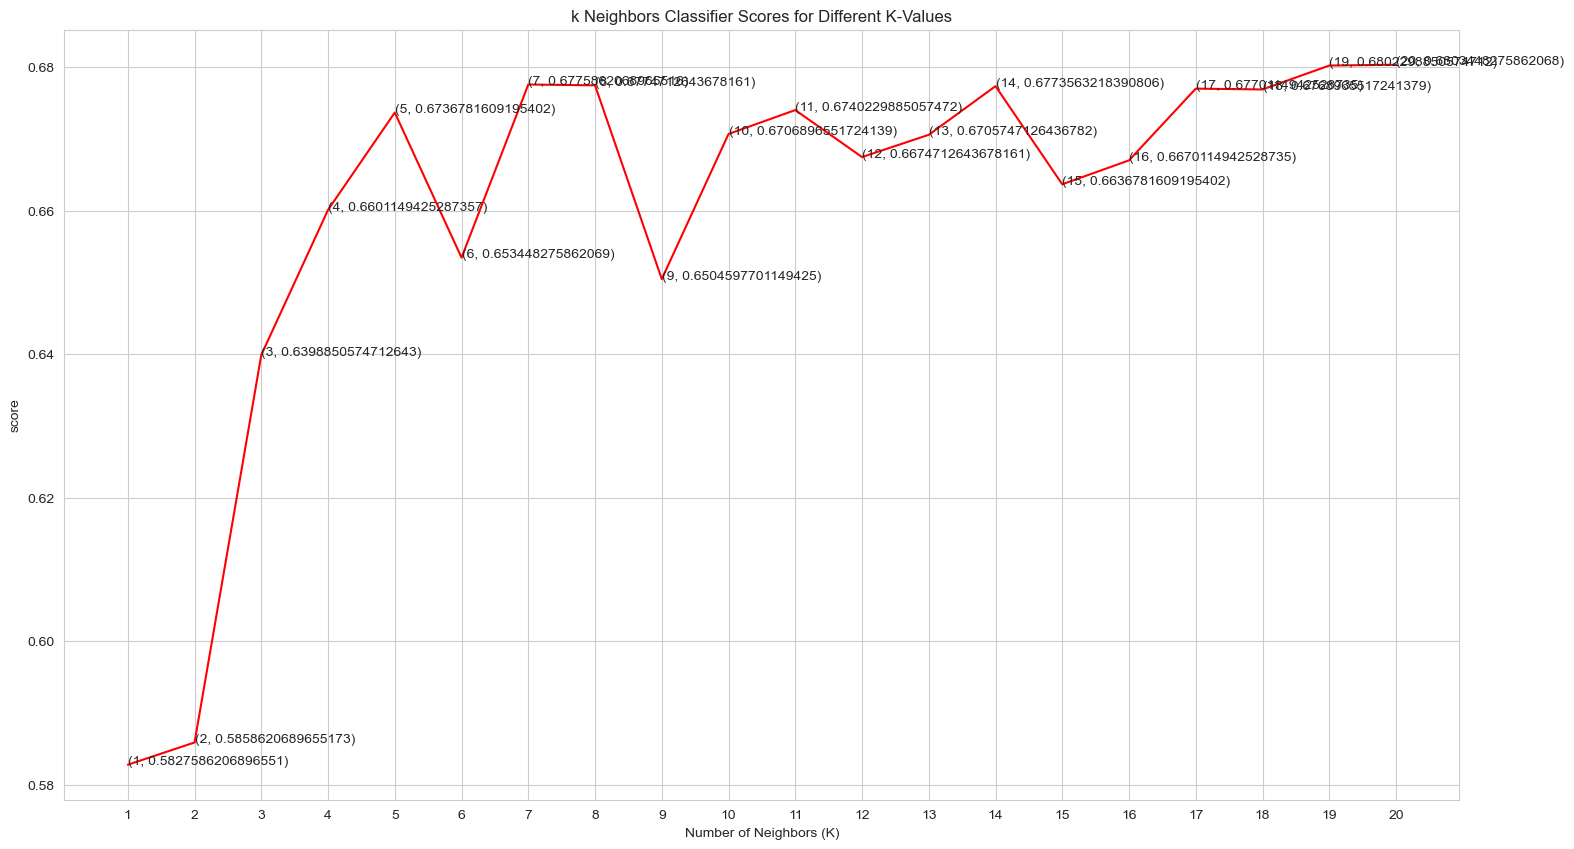

In [32]:
fig= plt.figure(figsize=(18,10))
plt.plot([k for k in range(1,21)],knn_score,color='red')
for i in range (1,21):
         plt.text(i,knn_score[i-1],(i,knn_score[i-1]))
plt.xticks([i for i in range (1,21)]) 
plt.xlabel('Number of Neighbors (K)') 
plt.ylabel('score')
plt.title ('k Neighbors Classifier Scores for Different K-Values')

In [33]:
m4 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=19)
model=knn.fit(x_train,y_train)
knn_predict = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test,knn_predict)
knn_acc_score = accuracy_score(y_test,knn_predict)
print ("Confussion Mtarix")
print (knn_conf_matrix)
print ("\n")
print("Accuracy of K-Neighbors Classifier:",knn_acc_score*100,'\n')
print (classification_report(y_test,knn_predict))

Confussion Mtarix
[[33  3]
 [ 4 20]]


Accuracy of K-Neighbors Classifier: 88.33333333333333 

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.87      0.83      0.85        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [34]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=6)
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_conf_matrix = confusion_matrix(y_test,dt_predict)
dt_acc_score = accuracy_score(y_test,dt_predict)
print ("Confussion Mtarix")
print (dt_conf_matrix)
print ("\n")
print("Accuracy of Decision Tree Classifier:",dt_acc_score*100,'\n')
print (classification_report(y_test,dt_predict))

Confussion Mtarix
[[31  5]
 [ 6 18]]


Accuracy of Decision Tree Classifier: 81.66666666666667 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        36
           1       0.78      0.75      0.77        24

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



In [35]:
m6 = 'Support Vector Classifier'
svc = SVC(kernel='rbf',C=2)
svc.fit(x_train,y_train)
svc_predict = svc.predict(x_test)
svc_conf_matrix = confusion_matrix(y_test,svc_predict)
svc_acc_score = accuracy_score(y_test,svc_predict)
print ("Confussion Mtarix")
print (svc_conf_matrix)
print ("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print (classification_report(y_test,svc_predict))

Confussion Mtarix
[[33  3]
 [ 4 20]]


Accuracy of Support Vector Classifier: 88.33333333333333 

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.87      0.83      0.85        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [36]:
m7 = 'Extreme Gradient Boost'
xgb=XGBClassifier(learning_rate=0.01, n_estimators=25,max_depth=15,gamma=0.6,subsample=0.52,colsample_bytree=0.6,seed=27,reg_lambda=2,booster='dart',colsample_bylevel=0.6,colsample_bynode=0.5)
xgb.fit(x_train,y_train)
xgb_predict = xgb.predict(x_test)
xgb_conf_matrix = confusion_matrix(y_test,xgb_predict)
xgb_acc_score = accuracy_score(y_test,xgb_predict)
print ("Confussion Mtarix")
print (xgb_conf_matrix)
print ("\n")
print("Accuracy of Extreme Gradient Boost Classifier:",xgb_acc_score*100,'\n')
print (classification_report(y_test,xgb_predict))

Confussion Mtarix
[[33  3]
 [ 5 19]]


Accuracy of Extreme Gradient Boost Classifier: 86.66666666666667 

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        36
           1       0.86      0.79      0.83        24

    accuracy                           0.87        60
   macro avg       0.87      0.85      0.86        60
weighted avg       0.87      0.87      0.87        60



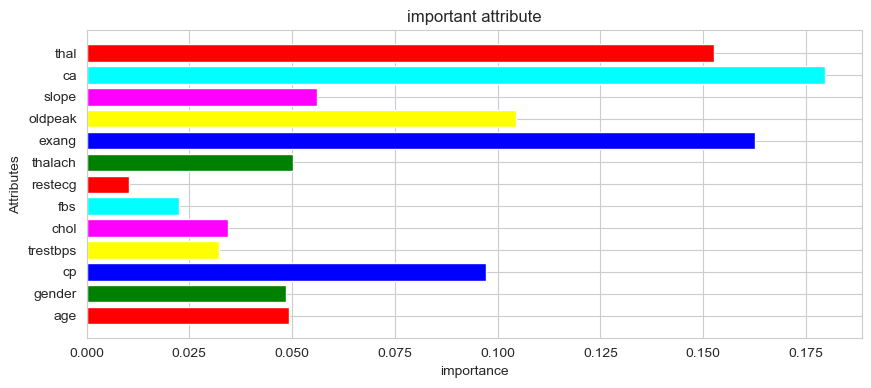

In [42]:
fig=plt.figure(figsize=(10,4))
colors=["red","green","blue","yellow","magenta","cyan"]
imp_feature =pd.DataFrame({'feature':['age','gender','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal',],'importance':xgb.feature_importances_})
plt.title("important attribute")
plt.xlabel("importance")
plt.ylabel("Attributes")
plt.barh(imp_feature['feature'],imp_feature['importance'],color=colors)
plt.show()

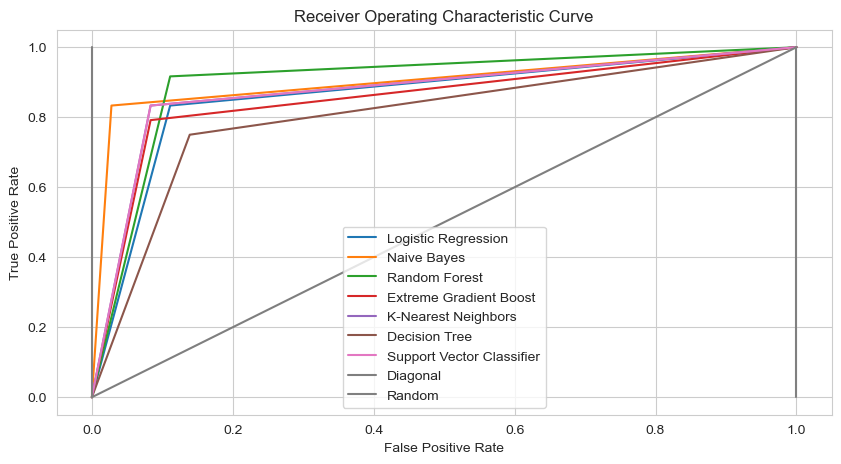

In [43]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predict)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predict)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predict)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predict)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbors')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decision Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],[0,1],label='Diagonal')
plt.plot([0,0],[1,0],c='.5',label='Random')
plt.plot([1,1],[0,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()